In [2]:
import pandas as pd
df = pd.read_csv('healthcare.csv')

In [3]:
df.head()

,0,1
0,1.616671,1.944522
1,1.256461,1.609444
2,-2.343919,4.392961
3,1.195393,2.794485
4,-3.329586,5.303160


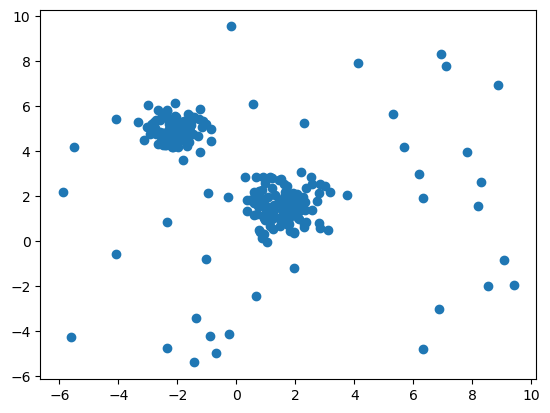

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0],df.iloc[:,1])

from sklearn.ensemble import IsolationForest


clf = IsolationForest(contamination=0.05) 
 This tells the model that you expect around 5% of the data points to be outliers.

 contamination acts as a guide for the model, influencing how it learns to distinguish between inliers and outliers.

 
By setting contamination appropriately, you help the model make more accurate predictions and better identify the anomalous data points.
Important Note:

The contamination value is an estimate. It doesn't guarantee that exactly that proportion of data will be classified as outliers.
The actual number of outliers identified may vary depending on the complexity of the data and the model's performance.

In [5]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.2)
clf.fit(df)
prediction = clf.predict(df) 


In [16]:
df.iloc[:,1]

0      1.944522
1      1.609444
2      4.392961
3      2.794485
4      5.303160
         ...   
245    1.958685
246    0.673557
247    1.555439
248    5.411917
249    4.941948
Name: 1, Length: 250, dtype: float64

In [6]:
prediction # -1 shows outlier, 1 shows inlier

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1

In [6]:
import numpy as np
index = np.where(prediction<0)


In [8]:
index

(array([  4,  20,  24,  31,  45,  48,  49,  53,  55,  60,  61,  62,  63,
         67,  72,  74,  78,  83,  85,  87,  89,  92,  97, 104, 108, 114,
        119, 126, 130, 132, 133, 141, 151, 160, 167, 177, 179, 182, 187,
        199, 204, 209, 212, 217, 220, 221, 227, 242, 247, 248]),)

In [7]:
x = df.values # plot krne k liye df se array krre taake index wale points plot kr sken easily

In [10]:
x

array([[ 1.61667145,  1.94452201],
       [ 1.2564615 ,  1.60944428],
       [-2.34391881,  4.3929613 ],
       [ 1.19539251,  2.79448461],
       [-3.32958612,  5.30315976],
       [ 1.6241983 ,  1.21875334],
       [ 0.45611969,  1.80757419],
       [ 0.62304325,  2.04424325],
       [-2.05908202,  4.6599109 ],
       [ 2.16307638,  1.39149293],
       [-2.13386677,  4.43599433],
       [-1.65311342,  4.92021328],
       [ 0.75047316,  2.23811621],
       [-1.71073925,  5.17482723],
       [ 0.86102444,  2.2819114 ],
       [-1.86274182,  4.55454246],
       [ 1.48027244,  1.79983231],
       [ 1.45223088,  2.69933991],
       [-1.65509092,  5.65092311],
       [ 1.22887123,  1.28838807],
       [ 9.39915672, -1.97148327],
       [ 2.04025339,  2.07645291],
       [ 0.890442  ,  1.09480523],
       [-2.35235014,  5.47163036],
       [ 0.56612677,  6.08881822],
       [-2.38207196,  4.28110426],
       [-2.57809122,  5.39059905],
       [-1.92902342,  4.84033579],
       [-2.40668213,

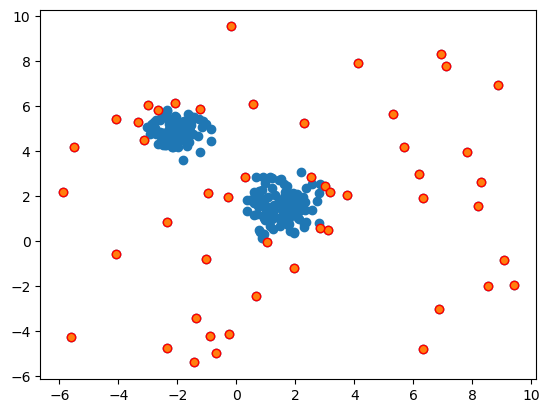

In [8]:
plt.scatter(x[:,0],x[:,1])# poora dataset plot kr rha
plt.scatter(x[index,0],x[index,1],edgecolors='r') # outlier btrha poore data mai se konsa hy, outlier plot krra mtlb

## local outlier function LOF

In [9]:
from sklearn.neighbors import LocalOutlierFactor

In [24]:
cf= LocalOutlierFactor(n_neighbors=2)

In [25]:

cf.fit(df)

LocalOutlierFactor(n_neighbors=2)

In [26]:
pred = cf.fit_predict(df)

In [27]:
pred

array([-1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1

In [28]:
index1 = np.where(pred<0)

In [21]:
index1

(array([  4,  24,  31,  49,  61,  63,  67,  85,  87, 108, 109, 114, 126,
        141, 160, 177, 181, 187, 197, 199, 200, 204, 248]),)

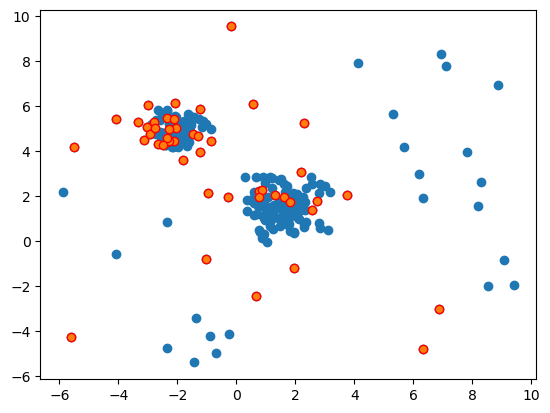

In [29]:
plt.scatter(x[:,0],x[:,1])# poora dataset plot kr rha
plt.scatter(x[index1,0],x[index1,1],edgecolors='r') 

In [30]:
print("index", index)
print("index1",index1)

index (array([  4,  20,  24,  31,  45,  48,  53,  55,  61,  62,  63,  67,  72,
        74,  78,  83,  85,  87,  89,  92,  97, 104, 108, 114, 119, 126,
       130, 132, 133, 141, 151, 160, 166, 167, 179, 182, 187, 197, 199,
       204, 209, 212, 217, 220, 221, 227, 242, 244, 247, 248]),)
index1 (array([  0,   2,   4,  10,  12,  14,  23,  24,  36,  45,  49,  60,  61,
        63,  65,  67,  77,  79,  80,  83,  85,  87,  98, 104, 107, 109,
       124, 126, 133, 141, 153, 160, 177, 180, 181, 187, 197, 199, 200,
       202, 204, 224, 225, 232, 237, 241, 243, 248]),)


Choose local outlier detection if you are interested in identifying anomalies within specific regions or clusters of data.

Choose global outlier detection if you are interested in identifying extreme values that deviate significantly from the overall distribution of the data.

local outliers k liye we use lof
global outliers k liye we use isolation forest usually

Both local and global outliers are important to find, but their importance depends heavily on the specific context and the goals of your analysis.

Here's a breakdown:

Local Outliers:

Importance:
Detecting anomalies within specific clusters or regions: Local outliers are crucial when you need to identify data points that deviate significantly from their immediate neighbors, even if they seem normal in the broader context of the entire dataset.   
Identifying localized patterns or trends: Local outlier detection can help you discover unexpected variations or anomalies within specific subsets of your data.   
Applications:
Fraud detection: Identifying unusual transactions within a specific customer's account.   

Global Outliers:

Importance:
Identifying extreme values that deviate significantly from the overall distribution: Global outliers are essential when you need to find data points that are far away from the majority of the data points across the entire dataset.   
Discovering rare events or extreme cases: Global outlier detection can help you uncover rare events or extreme cases that might be important for further investigation.
Applications:
Quality control: Finding defective products in a manufacturing process.